# Explorar datasets Iris y melbdata

Antes leer sobre el dataset

https://archive.ics.uci.edu/ml/datasets/iris



In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv("iris.csv")

In [41]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [42]:
df.shape

(150, 6)

In [43]:
df.drop("Id",axis = 1, inplace = True)

In [44]:
df.duplicated().sum()

3

In [45]:
df.isnull().sum().sort_values(ascending=False)

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [46]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [47]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

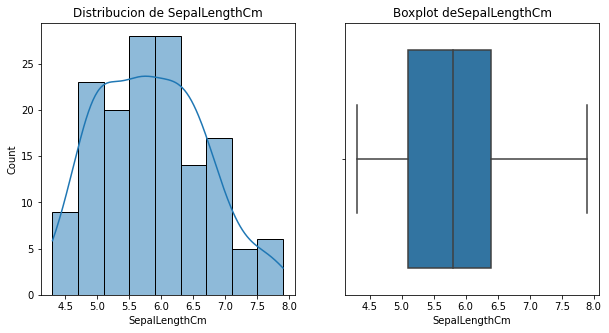

In [48]:
variable = 'SepalLengthCm'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = df, x = f"{variable}", ax=ax[1])

plt.show()

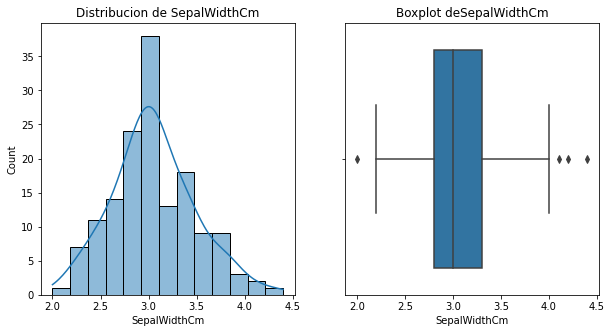

In [49]:
variable = 'SepalWidthCm'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = df, x = f"{variable}", ax=ax[1])

plt.show()

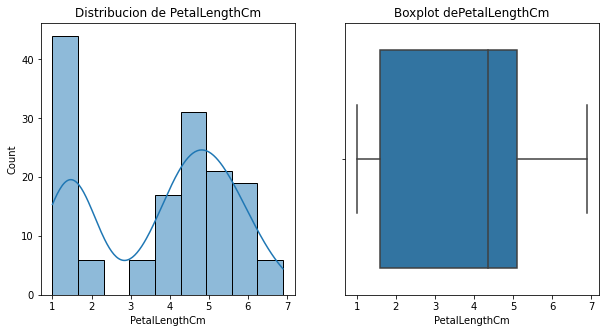

In [50]:
variable = 'PetalLengthCm'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = df, x = f"{variable}", ax=ax[1])

plt.show()

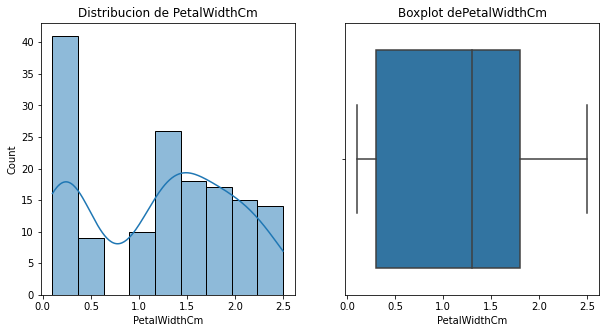

In [51]:
variable = 'PetalWidthCm'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = df, x = f"{variable}", ax=ax[1])

plt.show()

In [52]:
from sklearn.preprocessing import RobustScaler

rb_scaler = RobustScaler()
df['SepalLengthCm'],df['SepalWidthCm'],df['PetalLengthCm'],df["PetalWidthCm"] = rb_scaler.fit_transform(df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]).T
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-0.538462,1.0,-0.842857,-0.733333,Iris-setosa
1,-0.692308,0.0,-0.842857,-0.733333,Iris-setosa
2,-0.846154,0.4,-0.871429,-0.733333,Iris-setosa
3,-0.923077,0.2,-0.814286,-0.733333,Iris-setosa
4,-0.615385,1.2,-0.842857,-0.733333,Iris-setosa


In [53]:
from sklearn.preprocessing import LabelEncoder

df['Species'] = LabelEncoder().fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-0.538462,1.0,-0.842857,-0.733333,0
1,-0.692308,0.0,-0.842857,-0.733333,0
2,-0.846154,0.4,-0.871429,-0.733333,0
3,-0.923077,0.2,-0.814286,-0.733333,0
4,-0.615385,1.2,-0.842857,-0.733333,0


In [54]:
df["Species"].unique()

array([0, 1, 2])

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

X = df.drop(columns=['Species'])
y = df['Species']

model = LogisticRegression()

scores = cross_val_score(model, X, y, cv=10)
base_model_score = scores.mean()
y_pred = cross_val_predict(model, X, y, cv=3)

base_model_score

0.9533333333333334

In [61]:
from sklearn.metrics import confusion_matrix
matriz_de_confusion = confusion_matrix(y, y_pred)
matriz_de_confusion

array([[49,  1,  0],
       [ 0, 45,  5],
       [ 0,  4, 46]], dtype=int64)

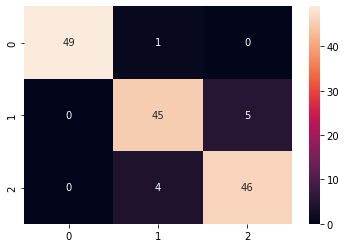

In [64]:
sns.heatmap(matriz_de_confusion, annot=True)
plt.show()